Кинетику твердофазных реакций можно изучать с помощью термических аналитических методов путем измерения свойств образца при нагреве или при постоянной температуре. Если реакция связана с потерей массы, то масса отслеживается на протяжении реакции, и кинетика обычно изучается с помощью термогравиметрии (ТГА). Тепловой эффект (выделяющийся или поглощаемый) - это еще одно измеряемое свойство, которое используется для кинетической оценки с использованием дифференциальной сканирующей калориметрии (ДСК) или дифференциального термического анализа (ДТА). Данные о потере массы или потоке тепла преобразуются в нормализованную форму, называемую степенью превращения ($\alpha$). Степень превращения варьирует от 0 до 1 и является мерой прогресса реакции в зависимости от времени или температуры.

Для изотермического термогравиметрического анализа доля превращения в любой момент времени определяется следующим образом:

$$ \alpha = \frac{{m_0 - m_t}}{{m_0 - m_{\infty}}} \tag{1}$$

где:
$ m_0 $ - начальная масса образца,
 $ m_t $ - масса образца в момент времени $ t $, 
 $ m_{\infty} $ - конечная масса образца.


$$ Нахождение~производной~конверсии$$

Данные о производной конверсии обычно получают путем численного дифференцирования данных о конверсии, для чего может быть использован метод конечных разностей. Существует три формы конечных разностей: прямая, обратная и центральная разности. Для промежуточных точек данных производная конверсии обычно рассчитывается с помощью центральной разности. Прямые и обратные разности используются для оценки данных о производной конверсии начальной и конечной точек данных соответственно. Соответствующие формулы для расчета приведены ниже:

$$
\left( \frac{d\alpha}{dT} \right)_i = 
\begin{cases} 
\frac{\alpha_{i+1} - \alpha_i}{T_{i+1} - T_i} & \text{для начальной точки} \\
\frac{1}{2} \left( \frac{\alpha_{i} - \alpha_{i-1}}{T_i - T_{i-1}} + \frac{\alpha_{i+1} - \alpha_i}{T_{i+1} - T_i} \right) & \text{для промежуточных точек} \\
\frac{\alpha_i - \alpha_{i-1}}{T_i - T_{i-1}} & \text{для конечной точки}
\end{cases}
$$

In [1]:
import json
import os
from pathlib import Path

current_directory = Path().resolve()
project_directory = current_directory.parent.parent
os.chdir(project_directory)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use(["science", "no-latex", "notebook", "grid"])
plt.rcParams["text.usetex"] = False

file_name = "NH4_rate_3_3_rcts_ads_ads_ads.json"
file_path = project_directory / "resources" / file_name

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

for reaction_key, reaction_data in data.items():
    if "x" in reaction_data:
        reaction_data["x"] = np.array(reaction_data["x"])




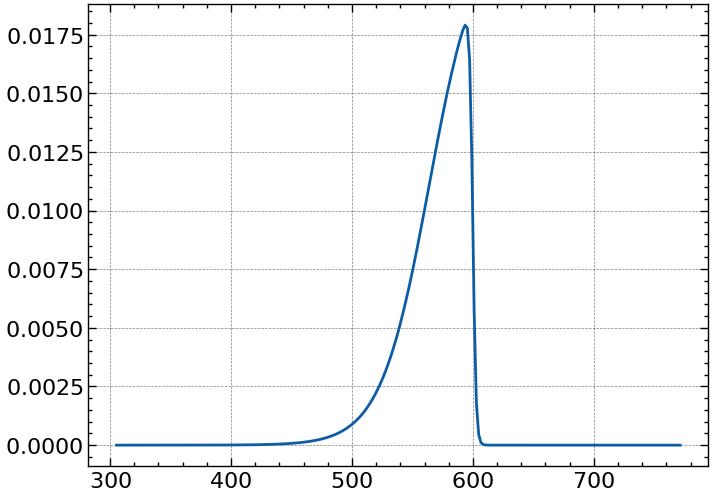

In [4]:
from src.core.curve_fitting import CurveFitting as cft


def parse_reaction(data, reaction_name):
    try:
        reaction_data = data[reaction_name]
        _x = (reaction_data["x"][0],  reaction_data["x"][-1])
        function_type = reaction_data["function"]
        coeffs = tuple([reaction_data["coeffs"][key] for key in cft._get_allowed_keys_for_type(function_type)])
        da_dT = cft.calculate_reaction((_x, function_type, coeffs))
        conversion = np.cumsum(da_dT)/np.cumsum(da_dT).max()
        x = np.linspace(_x[0], _x[1], 250)
        temperature = x + 273.15
    except KeyError:
        return None, None
    return temperature, conversion, da_dT

temperature, conversion, da_dT = parse_reaction(data, "reaction_1")
plt.plot(temperature, da_dT) if temperature is not None else None

$$ Прямой~дифференциальный~метод$$
Этот метод использует скорость нагрева, обычно линейную ($\beta$), для повышения температуры. Линейная программа нагрева следует формуле:

$$ T = T_0 + \beta t \tag{2}$$

где $T_0$ - начальная температура, $\beta$ - линейная скорость нагрева (К/мин), и $T$ - температура в момент времени $t$. 

Следующее соотношение можно определить для неизотермических экспериментов:

$$ \frac{{d\alpha}}{{dT}} = \frac{{d\alpha}}{{dt}} \cdot \frac{{dt}}{{dT}} \tag{3}$$

где $\frac{{d\alpha}}{{dT}}$ - неизотермическая скорость реакции; $\frac{{d\alpha}}{{dt}}$ - изотермическая скорость реакции, а $\frac{{dt}}{{dT}}$ - скорость нагрева ($\beta$). 

Дифференциальный закон скорости для реакции первого порядка может быть записан в виде:$$ Скорость~реакции~=~\frac{d[A]}{dt}=-k[A]\tag{4}$$ 
Здесь скорость реакции (изменение концентрации $[A]$ в единицу времени) пропорциональна концентрации реагента $[A]$. Отрицательный знак указывает на то, что концентрация $[A]$ с течением времени уменьшается.


Переформулировав уравнение (4), заменим концентрацию реагента $[A]$ на степень превращения $\alpha$: $$ Скорость~реакции~=~\frac{d\alpha}{dt} = k\left(1 - \alpha\right) \tag{5}$$

Обобщим уравнение (5), введя функцию $f(\alpha)$, которая отражает специфический характер реакции.$$\frac{d\alpha}{dt} = kf(\alpha)\tag{6}$$ 

Уравнение Аррениуса, которое описывает температурную зависимость константы скорости реакции выглядит следующим образом:$$k = A e^{-\frac{E_a}{RT}} \tag{7}$$
Путем подстановки уравнения Аррениуса (7) в обобщенный дифференциальный закон скорости (6) получаем:$$\frac{d\alpha}{dt} = A e^{-\frac{E_a}{RT}}f(\alpha) \tag{8}$$
Подставляя уравнение (8) в уравнение (3), получим дифференциальную форму неизотермического закона скорости:

$$ \frac{{d\alpha}}{{dT}} = \frac{A}{\beta}  e^{-\frac{{E_a}}{{RT}}}  f(\alpha) \tag{9}$$
Откуда: $$\ln\left(\frac{{da}}{{dT}}\cdot\frac{{1}}{{f(a)}}\right) = \ln \frac{{A}}{{\beta}} - \frac{{E_a}}{{RT}} \tag{10}$$

Построение графика левой части (включая модель $f(\alpha)$) относительно $\frac{1}{T}$ позволяет получить энергию активации ($E_a$) и предэкспоненциальный множитель ($A$) из наклона и пересечения с осью $y$ соответственно. Обычно выбирается модель, которая обеспечивает наилучшую линейную аппроксимацию.


In [5]:
from src.core.app_settings import NUC_MODELS_TABLE
from src.core.model_fit_calculation import DirectDiff

ALPHA_MIN = 0.001
ALPHA_MAX = 0.999
BETA = 3

direct_diff = DirectDiff(ALPHA_MIN, ALPHA_MAX, 0.9)
dd_df = direct_diff.calculate(temperature, pd.Series(conversion), BETA)
dd_df.head(10)

,Model,R2_score,Ea,A
10,D4,0.9985,199082.0,2.106e+16
30,G7,0.9978,202106.0,4.024e+17
8,D2,0.9970,193655.0,2.451e+16
36,R2,0.9967,99724.0,8.225e+07
29,G6,0.9966,-211931.0,1.161e-19
18,F1/3,0.9960,94747.0,3.170e+07
28,G5,0.9957,-103069.0,5.370e-10
31,G8,0.9936,209036.0,1.134e+18
9,D3,0.9936,209036.0,2.520e+17
37,R3,0.9886,104701.0,1.897e+08


<Axes: xlabel='T, K'>

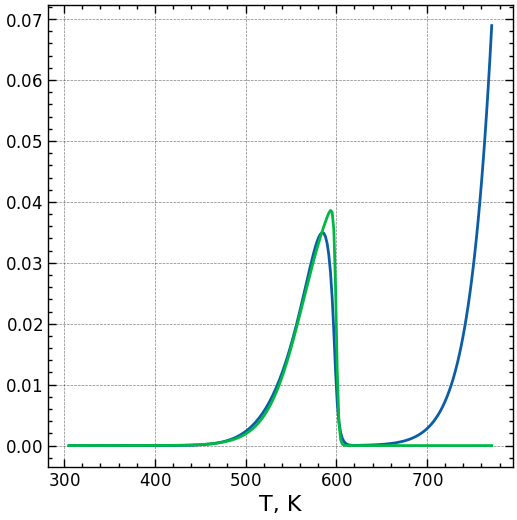

In [8]:
model_key = "G7"
dd_model = dd_df[dd_df["Model"] == model_key]
dd_result = (
    dd_model["A"].values.astype(float) / BETA
    * np.exp(-dd_model["Ea"].values.astype(float)
             / 8.314 / temperature
    ))

f_a = NUC_MODELS_TABLE[model_key]["differential_form"](1 - conversion)
model_result = dd_result * f_a
da_dT = pd.Series(conversion).diff()
da_dT[0] = 0

plot_df = pd.DataFrame({"temperature": temperature, "model_result": model_result, "da_dT": da_dT})
plot_df.plot(x="temperature", figsize=(6,6), legend=False, fontsize=12, xlabel="T, K")

$$Метод~Фримена~и~Кэрролла$$

Взятие натурального логарифма от дифференциальной формы закона скорости неизотермической реакции (уравнение 9) даёт:

$$
\ln \frac{d\alpha}{dT} = \ln \frac{A}{\beta} - \frac{Ea}{RT} + \ln f(\alpha) \tag{11}
$$

Если взять приращения переменных в уравнении (11), получим:

$$
\Delta \ln \frac{d\alpha}{dT} = \Delta \ln f(\alpha) - \frac{Ea}{R}\,\Delta \frac{1}{T} \tag{12}
$$

Разделив обе части уравнения (12) на приращение обратной температуры, получим:

$$
\frac{\Delta \ln \frac{d\alpha}{dT}}{\Delta \frac{1}{T}} = \frac{\Delta \ln f(\alpha)}{\Delta \frac{1}{T}} - \frac{Ea}{R} \tag{13}
$$

или, разделив уравнение (12) на $\Delta \ln f(\alpha)$:

$$
\frac{\Delta \ln \frac{d\alpha}{dT}}{\Delta \ln f(\alpha)} = 1 - \frac{Ea}{R}\,\frac{\Delta \frac{1}{T}}{\Delta \ln f(\alpha)} \tag{14}
$$

Активационная энергия может быть получена путём построения графика левой части уравнения (13) против $\Delta \ln f(\alpha) / \Delta \frac{1}{T}$ (точка пересечения с осью ординат) или графика левой части уравнения (14) против $\Delta \frac{1}{T} / \Delta \ln f(\alpha)$ с нахождением угла наклона прямой.


In [9]:
from src.core.model_fit_calculation import FreemanCaroll

Freeman_Caroll = FreemanCaroll(ALPHA_MIN, ALPHA_MAX, 0.9)
fc_df = Freeman_Caroll.calculate(temperature, pd.Series(conversion), BETA)
fc_df.head(10)

C:\IDE\repository\solid-state_kinetics\src\core\model_fit_calculation.py:387: RuntimeWarning: invalid value encountered in log
  ln_f_a = np.log(model_func(conversion_series) + epsilon)


,Model,R2_score,Ea,A
0,A2,0.0321,27304.0,3.335e+00
2,A3,0.0320,5148.0,2.874e-02
6,A5/2,0.0320,12584.0,1.397e-01
3,A3/2,0.0319,69746.0,4.360e+04
5,A4,0.0319,-2321.0,5.796e-03
33,P2,0.0314,-52884.0,4.970e-10
35,P3/2,0.0314,-52885.0,1.905e-12
36,P4,0.0314,-52875.0,1.316e-09
8,D1,0.0314,-52885.0,9.081e-14
34,P3,0.0314,-52882.0,1.006e-09


$$ Интегральные~методы$$

Интегрирование дифференциального неизотермического уравнения скорости приводит к интегральной форме неизотермического уравнения скорости:

$$ g(a) = \frac{A}{\beta} \int_{0}^{T} e^{\frac{-Ea}{RT}} dT \tag{15} $$

Этот интеграл называется температурным интегралом и не имеет аналитического решения. Чтобы преобразовать вышеупомянутый интеграл в более общую форму, которую можно найти в математических справочниках, переменную интегрирования можно переопределить как,

$$x = \frac{Ea}{RT}$$

и температурный интеграл становится:

$$ g(a) = \frac{AEa}{\beta R} \int_{x}^{\infty} \frac{e^{-x}}{x^2} dx \tag{16} $$

Если $p(x) = \int_{x}^{\infty} \frac{e^{-x}}{x^2} dx$, тогда уравнение 16 может быть записано как:

$$g(a) = \frac{AE_a}{\beta R} p(x) \tag{17}$$

где $p(x)$ - экспоненциальный интеграл. Основные подходы, используемые для оценки температурного/экспоненциального интеграла, включают:

1. Вычисление значений $p(x)$ численно.
2. Преобразование $p(x)$ в приближенную форму, которую можно интегрировать.
3. Аппроксимация $p(x)$ рядом разложения.


Два наиболее используемых ряда для аппроксимации температурного интеграла:

I. Асимптотическое разложение в ряд

$$p(x) = \frac{e^{-x}}{x^2} \left(1 - \frac{1}{2!x} + \frac{1}{3!x^2} - \frac{1}{4!x^3} + \ldots + (-1)^n \frac{n}{(n+1)!x^n} + \ldots \right)$$

II. Разложение в ряд Шлёмилха

$$p(x) = \frac{e^{-x}}{x(x+1)} \left(1 - \frac{1}{(x+2)} + \frac{2}{(x+2)(x+3)} - \frac{4}{(x+2)(x+3)(x+4)} + \ldots \right)$$

Многие приближения были предложены для температурного интеграла, два из которых будут рассмотрены - это приближения Дойла и Сенума-Янга. Они являются одними из наиболее распространенных приближений температурного/экспоненциального интеграла, так как каждое из них является основой для конкретного метода кинетического расчета.

$$ Приближение~Дойля $$ 

Приближение экспоненциального интеграла ($p(x)$) Дойлем основано на наблюдении, что $\log p(x)$ довольно линейно относительно $x$ в небольшом диапазоне значений $x$. Дойль приближал значения $p(x)$, используя первые три члена ряда Шлёмилха и наблюдаемое линейное соотношение для $x = 28–50$, чтобы получить по регрессии следующее приближение температурного интеграла:

$$\log p(x) = -2.315 - 0.4567x \tag{18}$$

Определено, что качество этой линейной зависимости довольно высоко с $R^2 = 0.99999$.

$$Приближение~Сенума-Янга$$ 

Сенум и Янг разработали точное нелинейное приближение температурного интеграла. Если переменные в Ур. 16 преобразуются так, что $x = zy$, то интеграл становится,

$$g(a) = \frac{AEa}{Rz} \int_{1}^{\infty} \frac{e^{zy}}{y^2} dy$$


Которое можно записать как,

$$g(a) = \frac{AEa}{Rz} E_2(z) \tag{19}$$

$E_2(z)$ или, в общем случае, $E_v(z)$ (где $v$ - целое число) - это хорошо известный интеграл для $z > 0$, заданный следующей непрерывной дробью:

$$\frac{E_v(z)}{z} = \frac{e^{-z}}{z} \cdot \cfrac{e^z}{z + \cfrac{v}{1 + \cfrac{1}{z + \cfrac{v+1}{1 + \cfrac{2}{z + \ddots}}}}}$$

Усечение числа членов в вышеприведенной непрерывной дроби дает первое (один член), второе (два члена), третье (три члена) и четвертое (четыре члена) рациональные приближения, известные как приближения Сенума-Янга.

$$ 1.~~p(x) = \frac{e^x}{x} - \frac{1}{x + 2} $$
$$ 2.~~p(x) = \frac{e^x}{x} - \frac{x + 4}{x^2 + 6x + 6} $$
$$ 3.~~p(x) = \frac{e^x}{x} - \frac{x^2 + 10x + 18}{x^3 + 12x^2 + 36x + 24} $$
$$ 4.~~p(x) = \frac{e^x}{x} - \frac{x^3 + 18x^2 + 86x + 96}{x^4 + 20x^3 + 120x^2 + 240x + 120} $$



$$ Метод~Коутса–Редферна $$

Этот метод использует интегральную форму неизотермического закона скорости (уравнение 17). Коутс и Редферн использовали асимптотическое разложение ряда для приближения температурного интеграла (p(x)), получив:

$$\ln\left(\frac{g(a)}{T^2}\right) = \ln\left(\frac{AR}{\beta E_a} \left[1 - \frac{2RT_{\text{exp}}}{E_a}\right]\right) + \frac{E_a}{RT} \tag{20}$$



где $T_{\text{exp}}$ - средняя экспериментальная температура. Построение графика левой части (включая модель, $g(a)$) уравнения 20 в отношении $1/T$ дает энергию активации ($E_a$) и частотный фактор (A) от угла наклона прямой и пересечения с осью ординат, соответственно. Выбирается модель, которая дает наилучшую линейную аппроксимацию. 

In [10]:
from src.core.model_fit_calculation import CoatsRedfern

Coats_Redfern = CoatsRedfern(ALPHA_MIN, ALPHA_MAX, 0.9)
cr_df = Coats_Redfern.calculate(temperature, conversion, BETA)

cr_df.head(5)

,Model,R2_score,Ea,A
30,G6,0.9753,332740.0,1.377e+29
10,D3,0.9749,142610.0,1.100e+10
29,G5,0.9749,247554.0,2.732e+21
28,G4,0.9743,162368.0,4.828e+13
1,A2/3,0.9736,119775.0,5.911e+09


<Axes: title={'center': 'Model D3'}, xlabel='1/1000T, $K^{-1}$'>

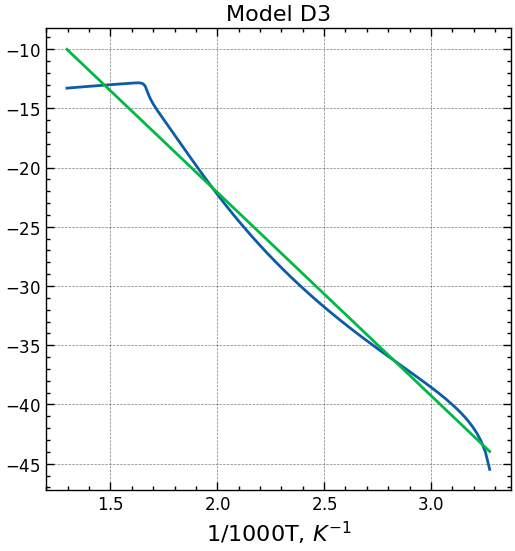

In [11]:
model_key = "D3"
model_func = NUC_MODELS_TABLE[model_key]["integral_form"]
g_a_val = model_func(1 - conversion)
lhs = Coats_Redfern.calculate_coats_redfern_lhs(g_a_val, temperature)
temperature_clean, lhs_clean = Coats_Redfern._filter_inf_data(lhs, temperature)
reverse_temperature = 1 / temperature_clean * 1000

_x = reverse_temperature
_y = lhs_clean
slope, intercept = np.polyfit(_x, _y, 1)
y = reverse_temperature * slope + intercept

plot_df = pd.DataFrame({"reverse_temperature": reverse_temperature, "lhs_clean": lhs_clean, "y": y})
plot_df.plot(x="reverse_temperature", figsize=(6,6), legend=False, fontsize=12,
             title=f"Model {model_key}", xlabel="1/1000T, $K^{-1}$")